# Auto-encoders
Before using this notebook be sure to set Python version 3.12.10.

This notebook is on auto-encoders. auto-encoders compress data, and reconstruct data from the compressed data. This process of reconstruction can be seen as a generative process. The process of compression to the bottleneck dimensions and reconstructing the complete data from the compressed data is visualized in the image below.

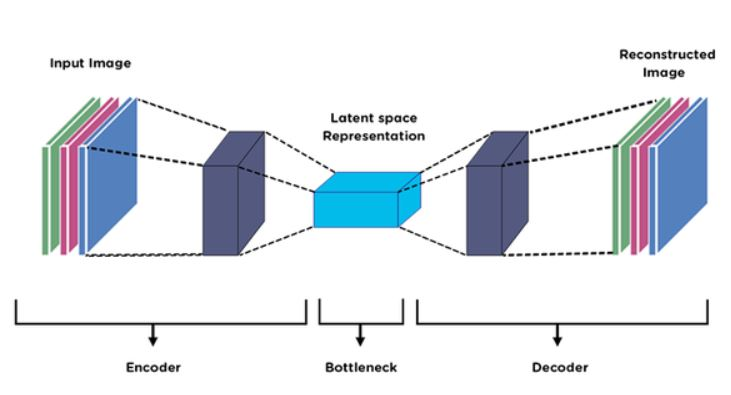

In [44]:
%pip install --upgrade pip
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install scipy
%pip install tqdm
%pip install pandas
%pip install wakepy
%pip list

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Package                   Version
------------------------- -------------
anyio                     4.11.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.4.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.4.0
babel                     2.17.0
beautifulsoup4            4.14.2
bleach                    6.3.0
build                     1.2.2.post1
CacheControl              0.14.1
c

In [45]:
%pip install notebook
%pip install ipython
%pip install ipywidgets
%pip install ipympl
%pip list

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Package                   Version
------------------------- -------------
anyio                     4.11.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.4.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.4.0
babel                     2.17.0
beautifulsoup4            4.14.2
bleach                    6.3.0
build                     1.2.2.post1
CacheControl              0.14.1
certifi                   2024.12.14
cffi                      2.0.0
charset-normalizer        3.4.0
cleo                      2.1.0
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.2
crashtest                 0.4.1
cycl

In [ ]:
%pip install torch torchvision
%pip show torch
%pip install sympy

Note: you may need to restart the kernel to use updated packages.
Name: torch
Version: 2.9.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org
Author: 
Author-email: PyTorch Team <packages@pytorch.org>
License: BSD-3-Clause
Location: c:\Users\wilfr\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, setuptools, sympy, typing-extensions
Required-by: torchvision
Note: you may need to restart the kernel to use updated packages.


In [47]:
#%matplotlib inline

## Principal Component Analysis (PCA)
Before continuing to the auto-encoder part of this notebook, it is interesting to turn attention to PCA.
A dimensionality-reduction technique in which transformation of high dimensional correlated data is performed into a lower-dimensional set of uncorrelated components also referred to as principal components.
Even though almost every mathematical technique has some known implementation in some Python library, I would like to give a simple idea of how it works using basic mathematical components.

- center data
- calculate covariance matrix
- calculate eigenvectors and eigenvalues using covariance matrix: as the covariance matrix is a symmetric matrix the eigenvectors for it are perpendicular.
- project the centered data using some eigenvectors

For an extensive elaboration on PCA see https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html



For a square matrix A, and every one of its  Eigenvectors and corresponding Eigenvalues the following equation is true:

$$ Av = \lambda v$$
$$ A = \text{a matrix} $$
$$ v = \text{an Eigenvector} $$
$$ \lambda = \text{an Eigenvalue} $$

To find the Eigenvalues for a simple matrix A


$$\left[\begin{matrix}0 & 1\\-2 & -3\end{matrix}\right]$$


One can use the formula  $|Av\text{-}\lambda I | = 0$.


$A\text{-}\lambda I$ can be  calculated as follows


$$\left[\begin{matrix}0 & 1\\-2 & -3\end{matrix}\right] - \left[\begin{matrix}1.0 \lambda & 0\\0 & 1.0 \lambda\end{matrix}\right]=\left[\begin{matrix}- 1.0 \lambda & 1\\-2 & - 1.0 \lambda - 3\end{matrix}\right]$$


The determinant for $A\text{-}\lambda I$ is


$$1.0 \lambda^{2} + 3.0 \lambda + 2=0$$

having 2 solutions for $\lambda$

$$\left[ -2.0, \  -1.0\right]$$

In [ ]:
import sympy	
import numpy as np
from numpy import array
from sympy import print_latex, solve 
A=array([[0,1],[-2,-3]])
id = np.identity(A.ndim)
lamda = sympy.Symbol('lamda')
id_lamda = sympy.Matrix(id * lamda)
A_lamda_id = sympy.Matrix(A) - id_lamda
eigenvalues = solve(A_lamda_id.det(), lamda)
print(eigenvalues)

Note: you may need to restart the kernel to use updated packages.
[-2.00000000000000, -1.00000000000000]


As there are two Eigenvalues, two Eigenvectors can be found. The Eigenvalues are used to calculate Eigenvectors.


$|A\text{-}\lambda I |.v = 0$ looks like this

$$\left[\begin{matrix}- 1.0 \lambda v_{1} + v_{2}\\- 2 v_{1} + v_{2} \left(- 1.0 \lambda - 3\right)\end{matrix}\right]=0$$

After substitution of $\lambda=-2$ the equation looks like below:

$$\left[\begin{matrix}2.0 v_{1} + v_{2}\\- 2 v_{1} - 1.0 v_{2}\end{matrix}\right]=0$$

The solution for this equation is like below:

$$\left[\begin{matrix}1\\-2.0\end{matrix}\right]$$

This solution is called the Eigenvector, but 2 and -4 could just as well have been a solution. This Eigenvector corresponds to the Eigenvalue $\lambda=-2$

The other $\lambda$ value -1 can be used to find another Eigenvector:

$$\left[\begin{matrix}1\\-1.0\end{matrix}\right]$$


In [2]:
v1 = sympy.Symbol('v1')
v2 = sympy.Symbol('v2')
lamda = sympy.Symbol('lamda')
eigenvectoren=[]
for ev in eigenvalues:
	eig=A_lamda_id*sympy.Matrix(array([v1,v2]))
	eig=eig.subs(lamda, ev)
	print(eig)
	eig=eig.subs(v1,1)
	solution_eig=solve(eig, v1,v2)
	eigenvectoren.append([1,solution_eig[v2]])

print(f"eigenvectoren:{eigenvectoren}")

Matrix([[2.0*v1 + v2], [-2*v1 - 1.0*v2]])
Matrix([[1.0*v1 + v2], [-2*v1 - 2.0*v2]])
eigenvectoren:[[1, -2.00000000000000], [1, -1.00000000000000]]


In [17]:
eigenvectoren = np.array(eigenvectoren, dtype=float)
inv_eigenvectoren= np.linalg.inv(eigenvectoren)
diag_eigenvalues= np.diag(eigenvalues)

original_matrix=eigenvectoren @ diag_eigenvalues @ inv_eigenvectoren
print(original_matrix)

[[0 1.00000000000000]
 [-2.00000000000000 -3.00000000000000]]


In [18]:
import numpy as np
from numpy import array


def pca(A):
    print("matrix A")
    print(A)
    # the mean of each column
    M = np.mean(A.T, axis=1)
    print("means")
    print(M)
    # center columns by subtracting column means
    C = A - M
    print("centered data = A-M")
    print(C)
    # calculate covariance matrix of centered matrix
    V = np.cov(C.T)
    print("covariance matrix for centered A")
    print(V)
    # get eigenvectors and values of covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(V)
    print("eigenvectors for the covariance matrix")
    print(eigenvectors)
    print("eigenvalues for the covariance matrix")
    print(eigenvalues)
    print("diag(eigenvalues)")
    diag_eig=np.diag(eigenvalues)
    print(diag_eig)
    print("eigenvectors")
    print(eigenvectors[:,0])
    print(eigenvectors[:,1])
    print(eigenvectors[:,2])
    print("eigenvectors perpendicular?")
    print(np.rad2deg(np.arccos(np.dot(eigenvectors[:,0], eigenvectors[:,1]))))
    print(np.rad2deg(np.arccos(np.dot(eigenvectors[:,1], eigenvectors[:,2]))))
    print(np.rad2deg(np.arccos(np.dot(eigenvectors[:,0], eigenvectors[:,2]))))

    print(np.dot(eigenvectors[:,0], eigenvectors[:,2]))
    # project data
    PCA = eigenvectors.T.dot(C.T)
    print("pca t")
    print(PCA.T)
    print("pca1")
    return PCA.T

In [49]:
from numpy import array
A = array([[1, 2, 4], [3, 4, 3], [5, 6, 4]])
my_pca_A=pca(A)

matrix A
[[1 2 4]
 [3 4 3]
 [5 6 4]]
means
[3.         4.         3.66666667]
centered data = A-M
[[-2.         -2.          0.33333333]
 [ 0.          0.         -0.66666667]
 [ 2.          2.          0.33333333]]
covariance matrix for centered A
[[4.         4.         0.        ]
 [4.         4.         0.        ]
 [0.         0.         0.33333333]]
eigenvectors for the covariance matrix
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
eigenvalues for the covariance matrix
[8.         0.         0.33333333]
diag(eigenvalues)
[[8.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.33333333]]
eigenvectors
[0.70710678 0.70710678 0.        ]
[-0.70710678  0.70710678  0.        ]
[0. 0. 1.]
eigenvectors perpendicular?
90.0
90.0
90.0
0.0
pca t
[[-2.82842712  0.          0.33333333]
 [ 0.          0.         -0.66666667]
 [ 2.82842712  0.          0.33333333]]
pca1


##Using sklearn's PCA
Using the PCA library will produce the same results.

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
sk_A_pca=pca.fit_transform(A)
print("pca components")
print(pca.components_)
print("projected data")
print(sk_A_pca)

pca components
[[ 7.07106781e-01  7.07106781e-01  1.38777878e-17]
 [ 2.37339666e-17 -4.33601224e-17  1.00000000e+00]
 [-7.07106781e-01  7.07106781e-01  4.74426853e-17]]
projected data
[[-2.82842712e+00  3.33333333e-01 -3.16284569e-17]
 [-9.25185854e-18 -6.66666667e-01 -3.16284569e-17]
 [ 2.82842712e+00  3.33333333e-01 -3.16284569e-17]]


In [51]:
from matplotlib import pyplot as plt

def plotD(X, ax,xyz):
    with plt.ioff():
        #fig = plt.figure(figsize=(8,6))
        #ax = fig.add_subplot(projection='3d')
    
        for i in range(len(X)):  # plot each point + it's index as text above
            ax.scatter(round(X[i, 0],2), round(X[i, 1],2), round(X[i, 2],2), color='b')
            ax.text(X[i, 0], X[i, 1], X[i, 2], '%s' % ("("+str(round(X[i, 0],2))+","+str(round(X[i, 1],2))+","+str(round(X[i, 2],2)))+")", size=10, zorder=1,
                    color='k')


        #xt=list(np.linspace(1,4,7))
        ax.margins(0.6)
        ax.set_xlabel(xyz[0])
        ax.set_ylabel(xyz[1])
        ax.set_zlabel(xyz[2])


##Visualizing the data in a 3D plot

The plot to the left shows the original data, while the plot right shows how one dimensions has become superfluous (PC3). 

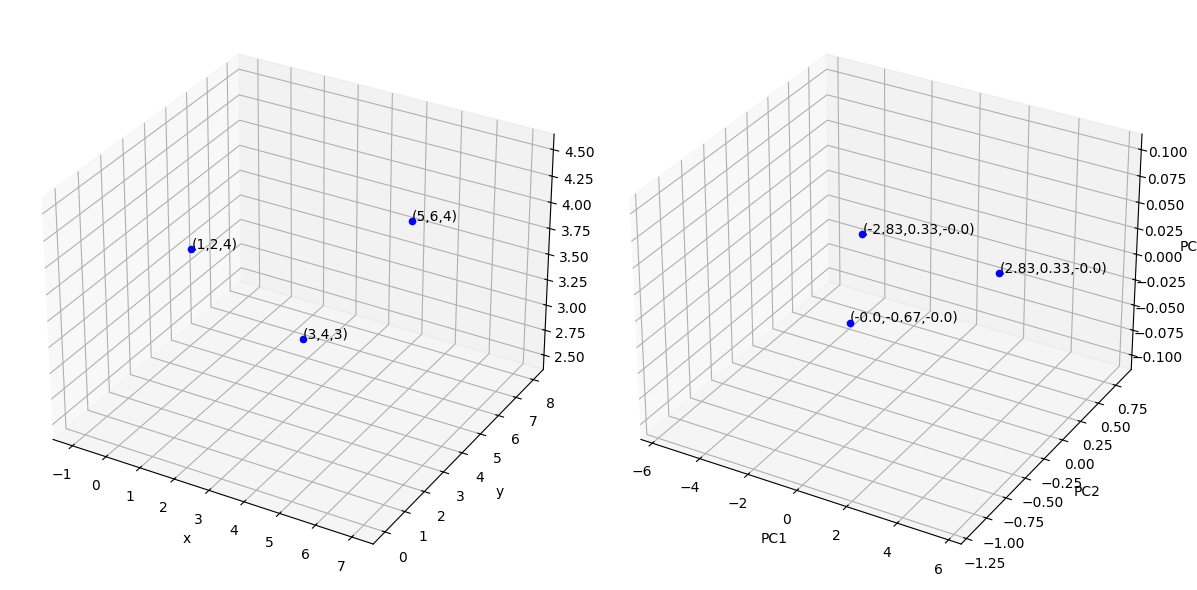

<Figure size 1800x600 with 0 Axes>

In [52]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax1 = fig.add_subplot(1, 2, 2, projection='3d')

plotD(A, ax, ['x','y','z'])
plotD(sk_A_pca,ax1, ['PC1','PC2','PC3'])
plt.tight_layout()
plt.subplots_adjust(wspace=.01)
plt.show()
plt.clf()


## Auto-encoder idea
In a way, an auto-encoder's encoder does the same a PCA dimension reduction does, compressing data to a simpler form.
After compressing the complex data, the auto-encoder tries to reconstruct the original image from the latent dimensions or bottleneck dimensions. The torchinfo for a very basic encoder is shown below. The first Linear layer (in sequential 1-1) minimizes an image to 2 dimensions, while the second linear layer (in sequential 1-2) reconstructs the compressed data back to its original dimensions. Auto-encoders I have seen up til now, use a perfectly inverse operation (compared to the encoder) to reconstruct/decode the compressed data. The input and output batchsize remains 4.

### A basic linear auto-encoder

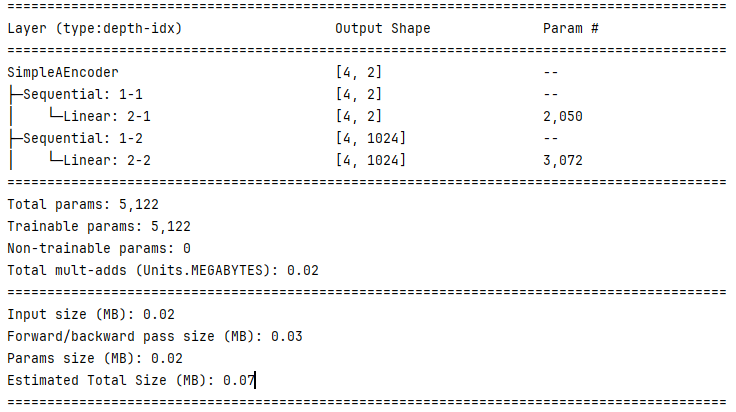

The model in code has a separate forward_dec method, sometimes it is interesting to call this method separately. The forward method itself flattens every image before feeding it into the encoder. The original dimensions are kept to reshape the 1024 pixels back to an image of size 32*32. As the the images are greyscale only one channel is needed to handle the images.

In [15]:
import torch
import torch.nn as nn

class SimpleAEncoder(nn.Module):
    def __init__(self, bottleneck_size=2):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Linear(32 * 32, bottleneck_size),
        )

        self.decoder = nn.Sequential(
            nn.Linear(bottleneck_size, 32 * 32),
        )
    def forward_dec(self, x):
        x= self.decoder(x)
        x = x.reshape(-1, 1, 32, 32)
        return x

    def forward(self, x):
        batch, channels, height, width = x.shape
        x = x.flatten(1)
        enc = self.encoder(x)
        dec = self.decoder(enc)
        dec = dec.reshape(batch, channels, height, width)

        return enc, dec

### A non linear auto-encoder
A slightly complexer non linear auto-encoder model is this one. Its decoder and encoder contain some activation functions, but basically it does the same as the linear auto-encoder.

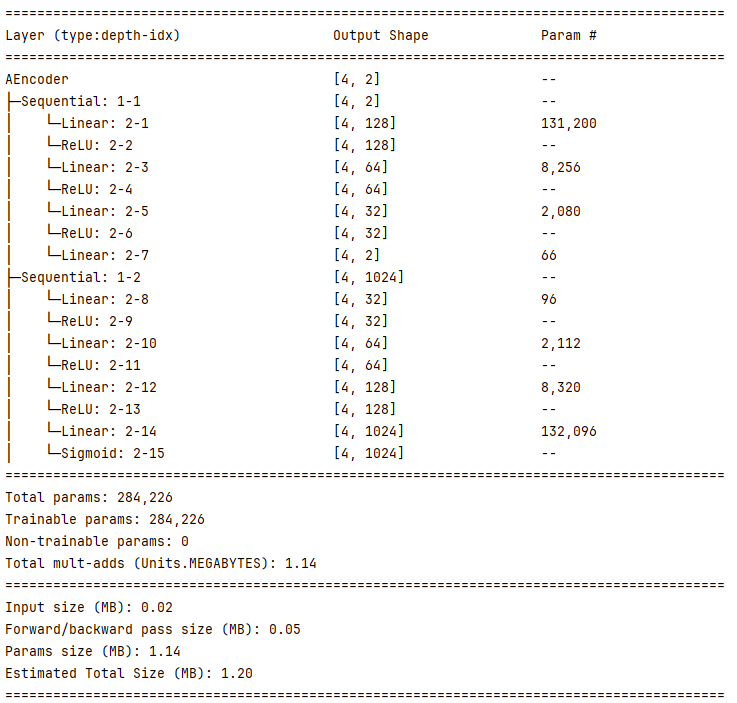

In [16]:
class AEncoder(nn.Module):
    def __init__(self, bottleneck_size=2):
        super().__init__()
        self.encoder=nn.Sequential(
            nn.Linear(32*32,128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,bottleneck_size)
        )
        self.decoder = nn.Sequential(
            nn.Linear(bottleneck_size, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 32*32),
            nn.Sigmoid()
        )
    def forward_enc(self,x):
        return self.encoder(x)
    def forward_dec(self,x):
        x= self.decoder(x)
        x=x.reshape(-1,1,32,32)
        return x

    def forward(self,x):
        batch, channels, height, width = x.shape
        x=x.flatten(1)
        enc=self.encoder(x)
        dec=self.decoder(enc)
        dec = dec.reshape(batch, channels, height, width)
        return enc,dec

### A convolutional auto-encoder

This is the most complex non-variational non-conditional auto-encoder in this project. The convolutions have different results for different input sizes, so one needs to do some calculations to get to the right configuration. Complexity is also to be found in the decoder, as the transpose function is not completely deterministic, some output padding parameter needs to be set. 

Batch normalization is a technique to speed up learning and stabilize training. https://www.youtube.com/watch?v=nT9nKBCjS_Y

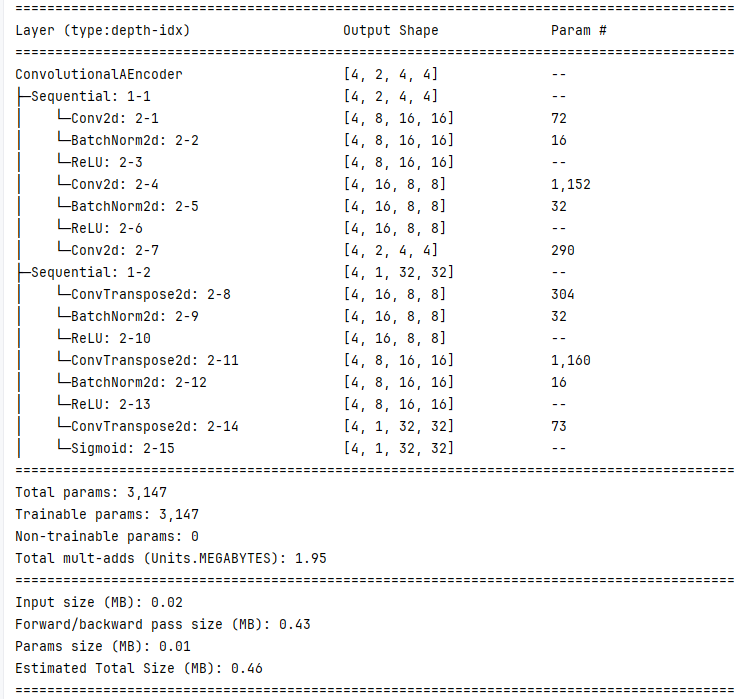

In [17]:
class ConvolutionalAEncoder(nn.Module):
    def __init__(self, in_channels=1, channels_bottleneck=4):
        super().__init__()
        self.bottleneck = channels_bottleneck
        self.in_channels = in_channels

        self.encoder_conv = nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=8, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=2, padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=self.bottleneck, kernel_size=3, stride=2, padding=1),
        )

        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(in_channels=self.bottleneck, out_channels=16, kernel_size=3, stride=2, padding=1,
                               output_padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=8, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=8, out_channels=in_channels, kernel_size=3, stride=2, padding=1,
                               output_padding=1),
            nn.Sigmoid()
        )

    def forward_enc(self, x):
        conv_enc = self.encoder_conv(x)
        return conv_enc

    def forward_dec(self, x):
        x=self.decoder_conv(x)
        x = x.reshape(-1, 1, 32, 32)

        return x

    def forward(self, x):
        batch_size, num_channels, height, width = x.shape
        enc = self.encoder_conv(x)
        dec = self.decoder_conv(enc)
        dec = dec.reshape(batch_size, num_channels, height, width)

        return enc, dec

In [37]:
import torch 
from torch import nn



images= torch.rand(4,1, 32,32)

layer=nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=2, padding=1, bias=False)

inv_layer= nn.ConvTranspose2d(in_channels=8, out_channels=1, kernel_size=3, stride=2, padding=1, output_padding=1)




conv_images=layer(images)
deconv_layers=inv_layer(conv_images)

print(conv_images.shape)
print(deconv_layers.shape)


torch.Size([4, 8, 16, 16])
torch.Size([4, 1, 32, 32])


### Getting the data
The models used in this notebook will be trained using MNIST data. MNIST data being handwritten digits having size 28*28 pixels. But after transforming they are in size 32*32.

In [11]:
from torchvision import transforms, datasets

def get_transform():
    t=transforms.Compose([transforms.Resize((32,32)),
        transforms.ToTensor()])
    return t

def get_data():
    t = get_transform()
    train= datasets.MNIST(root='./data', train=True, download=True, transform=t)
    test = datasets.MNIST(root='./data', train=False, download=True, transform=t)
    return train, test

## The train loop

In this part I will train and test the models using the data from the MNIST data set.

Training the data will produce some data to be used when visualizing the data or the loss during training.
In this case Loss is the pairwise difference between the original images and the reconstructions. It ends up being averaged per image.

$$loss = torch.mean((images - reconstruction) ** 2)$$

The train loop looks like below:

In [26]:
from torch import optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np


def train_ae(model,train_set, test_set, batch_size, training_iterations, evaluation_iterations, name):
    print(name)

    print(50*"#")

    trainloader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
    testloader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)
    optimizer = optim.Adam(model.parameters(), lr=0.0005)

    train_loss = []
    evaluation_loss = []
    train_losses = []
    evaluation_losses = []

    encoded_data_per_eval = []
    decoded_data_per_eval= []

    pbar = tqdm(range(training_iterations))

    train = True
    step_counter = 0
    num_used_to_train=0
    
    while train:

        for images, labels in trainloader:
            encoded, reconstruction = model(images)
            loss = torch.mean((images - reconstruction) ** 2)
            train_loss.append(loss.item())

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            num_used_to_train+=batch_size

            if step_counter % evaluation_iterations == 0:

                model.eval()
                encoded_evaluations = []
                decoded_evaluations = []

                for images, labels in testloader:
                    encoded, reconstruction = model(images)
                    loss = torch.mean((images - reconstruction) ** 2)
                    evaluation_loss.append(loss.item())

                    encoded, labels = encoded.flatten(1), labels.reshape(-1, 1)
                    decoded = reconstruction.flatten(1)

                    encoded_evaluations.append(torch.cat((encoded, labels), axis=-1))
                    decoded_evaluations.append(torch.cat((decoded, labels), axis=-1))

                encoded_data_per_eval.append(torch.concatenate(encoded_evaluations).detach())
                decoded_data_per_eval.append(torch.concatenate(decoded_evaluations).detach())

                train_loss = np.mean(train_loss)
                evaluation_loss = np.mean(evaluation_loss)

                train_losses.append(train_loss)
                evaluation_losses.append(evaluation_loss)

                print("Training Loss", train_loss)
                print("Evaluation Loss", evaluation_loss)

                train_loss = []
                evaluation_loss = []

                model.train()

            step_counter += 1
            pbar.update(1)

            if step_counter >= training_iterations:
                print("Training complete!")
                train = False
                break

    encoded_data_per_eval = [np.array(i) for i in encoded_data_per_eval]
    decoded_data_per_eval = [np.array(i) for i in decoded_data_per_eval]

    print("Final Training Loss", train_losses[-1])
    print("Final Evaluation Loss", evaluation_losses[-1])

    return model, train_losses, evaluation_losses, encoded_data_per_eval, decoded_data_per_eval


## Get a model, with some bottleneck size
As I am training multiple models, I need some dynamic way to get the appropriate model

In [13]:
def get_model(model_id, bottleneck_size):
    if model_id == 1:
        model = AEncoder(bottleneck_size=bottleneck_size)
    elif model_id == 2:
        model = SimpleAEncoder(bottleneck_size=bottleneck_size)
    else:
        model = ConvolutionalAEncoder(channels_bottleneck=bottleneck_size)
    return model

## Training the model
Training the model(s) can be done using code below. It saves loss, reconstructed data, encoded data to pickle files. This data is received from the train method. It also saves the model's trained pparameters. This to be able to recreate a trained model. As I am training multiple models, loop over the models is necessary. To get some results without having to wait for a complete training loop to finish, I i have set training\_iterations and testing\_iterations values to 250 and 25. Better values will be 25000 and 2500.

In [36]:
import pickle
import pathlib
import random
from wakepy import keep

training_iterations = 25000
evaluation_iterations = 2500
models=[1,2,3]
bottleneck_sizes=[2]


with keep.running():
    for model_id in models:
        for bs in bottleneck_sizes:
            torch.manual_seed(0)
            np.random.seed(0)
            random.seed(0)
            model = get_model(model_id, bs)

            name = str(model.__class__.__name__) + "_bottleneck_" + str(bs)
            pathlib.Path("intermediate/" + name).mkdir(parents=True, exist_ok=True)

            train_set, test_set = get_data()

            trained_model, train_losses, evaluation_losses, encoded_data, decoded_data = train_ae(model, 
                                                                                                train_set,
                                                                                                test_set,
                                                                                                batch_size=24,
                                                                                                training_iterations=training_iterations,
                                                                                                evaluation_iterations=evaluation_iterations,
                                                                                                name=name)

            with open('intermediate/' + name + '/encoded_data.pkl', 'wb') as f:
                pickle.dump(encoded_data, f)

            with open('intermediate/' + name + '/train_losses.pkl', 'wb') as f:
                pickle.dump(train_losses, f)

            with open('intermediate/' + name + '/evaluation_losses.pkl', 'wb') as f:
                pickle.dump(evaluation_losses, f)

            with open('intermediate/' + name + '/decoded_data.pkl', 'wb') as f:
                pickle.dump(decoded_data, f)

            torch.save(trained_model.state_dict(), "intermediate/" + name + "/model")


AEncoder_bottleneck_2
##################################################


  0%|          | 15/25000 [00:02<41:20, 10.07it/s]  

Training Loss 0.21727293729782104
Evaluation Loss 0.21932336198483154


 10%|█         | 2529/25000 [00:23<09:50, 38.05it/s] 

Training Loss 0.04809908951967955
Evaluation Loss 0.041620815400597005


 20%|██        | 5023/25000 [00:44<11:32, 28.85it/s] 

Training Loss 0.038238860669732096
Evaluation Loss 0.035949327842258724


 30%|███       | 7527/25000 [01:04<09:42, 29.97it/s] 

Training Loss 0.034818634309619664
Evaluation Loss 0.03393092489303302


 40%|████      | 10023/25000 [01:25<08:45, 28.48it/s]

Training Loss 0.03346500534042716
Evaluation Loss 0.03300310264852979


 50%|█████     | 12515/25000 [01:46<07:52, 26.42it/s] 

Training Loss 0.03261401877775788
Evaluation Loss 0.03239503385816261


 60%|██████    | 15022/25000 [02:09<05:34, 29.79it/s] 

Training Loss 0.03207424075007439
Evaluation Loss 0.032176502625183234


 70%|███████   | 17522/25000 [02:29<04:21, 28.57it/s] 

Training Loss 0.03161061442643404
Evaluation Loss 0.03162584233609178


 80%|████████  | 20013/25000 [02:51<02:53, 28.77it/s] 

Training Loss 0.03125920117869973
Evaluation Loss 0.031220276234783143


 90%|█████████ | 22511/25000 [03:19<02:42, 15.36it/s] 

Training Loss 0.03081372422352433
Evaluation Loss 0.03087393433409486


100%|█████████▉| 24997/25000 [03:40<00:00, 118.38it/s]C:\Users\wilfr\AppData\Local\Temp\ipykernel_15208\803423666.py:84: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  encoded_data_per_eval = [np.array(i) for i in encoded_data_per_eval]
C:\Users\wilfr\AppData\Local\Temp\ipykernel_15208\803423666.py:85: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  decoded_data_per_eval = [np.array(i) for i in decoded_data_per_eval]


Training complete!
Final Training Loss 0.03081372422352433
Final Evaluation Loss 0.03087393433409486


100%|██████████| 25000/25000 [03:41<00:00, 113.12it/s]


SimpleAEncoder_bottleneck_2
##################################################


  0%|          | 57/25000 [00:01<07:12, 57.73it/s] 

Training Loss 0.27664873003959656
Evaluation Loss 0.27350476123303247


 10%|█         | 2552/25000 [00:12<05:12, 71.90it/s] 

Training Loss 0.08032026297152042
Evaluation Loss 0.05501191006254235


 20%|██        | 5031/25000 [00:22<05:17, 62.87it/s] 

Training Loss 0.053939997486770155
Evaluation Loss 0.052973821044539945


 30%|███       | 7515/25000 [00:37<11:25, 25.50it/s] 

Training Loss 0.051404451602697375
Evaluation Loss 0.050069476524702936


 40%|████      | 10023/25000 [00:57<10:24, 23.97it/s]

Training Loss 0.04852451049089432
Evaluation Loss 0.04762258143019047


 50%|█████     | 12542/25000 [01:12<03:09, 65.75it/s] 

Training Loss 0.04688337548673153
Evaluation Loss 0.046711537808322795


 60%|██████    | 15047/25000 [01:25<02:48, 59.11it/s] 

Training Loss 0.046395019625127314
Evaluation Loss 0.04646647006845017


 70%|███████   | 17533/25000 [01:37<02:00, 62.10it/s] 

Training Loss 0.046228174570202826
Evaluation Loss 0.04635526395315746


 80%|████████  | 20027/25000 [01:49<01:24, 58.97it/s] 

Training Loss 0.046151036010682586
Evaluation Loss 0.04622034176433687


 90%|█████████ | 22531/25000 [02:01<00:35, 69.81it/s] 

Training Loss 0.046092496913671496
Evaluation Loss 0.046135313862519296


100%|██████████| 25000/25000 [02:12<00:00, 189.39it/s]

Training complete!
Final Training Loss 0.046092496913671496
Final Evaluation Loss 0.046135313862519296


ConvolutionalAEncoder_bottleneck_2
##################################################


  0%|          | 12/25000 [00:02<1:05:04,  6.40it/s]

Training Loss 0.238682821393013
Evaluation Loss 0.2195464570602353


 10%|█         | 2516/25000 [00:29<20:33, 18.22it/s] 

Training Loss 0.032846105812862514
Evaluation Loss 0.014356917462689127


 20%|██        | 5014/25000 [00:55<18:02, 18.47it/s] 

Training Loss 0.013842353983968497
Evaluation Loss 0.012938465244121117


 30%|███       | 7524/25000 [01:22<11:44, 24.79it/s] 

Training Loss 0.01283271360695362
Evaluation Loss 0.012031766505603739


 40%|████      | 10013/25000 [01:48<13:16, 18.81it/s]

Training Loss 0.012323262245208026
Evaluation Loss 0.01165922184092857


 50%|█████     | 12521/25000 [02:14<11:14, 18.49it/s] 

Training Loss 0.011984353835135698
Evaluation Loss 0.011460568426440445


 60%|██████    | 15013/25000 [02:40<08:47, 18.92it/s] 

Training Loss 0.011760623656585813
Evaluation Loss 0.01120670841184916


 70%|███████   | 17517/25000 [03:06<06:36, 18.86it/s] 

Training Loss 0.01158368996270001
Evaluation Loss 0.011146025949914894


 80%|████████  | 20023/25000 [03:32<03:23, 24.49it/s] 

Training Loss 0.0114401780474931
Evaluation Loss 0.010932449460235074


 90%|█████████ | 22511/25000 [03:59<02:34, 16.12it/s] 

Training Loss 0.011352811565436422
Evaluation Loss 0.010942073156990164


100%|██████████| 25000/25000 [04:27<00:00, 93.59it/s]


Training complete!
Final Training Loss 0.011352811565436422
Final Evaluation Loss 0.010942073156990164


### Reconstructed images

With this code the reconstructed images are displayed, when the models are hardly trained the image looks like this, with the original image on the left.

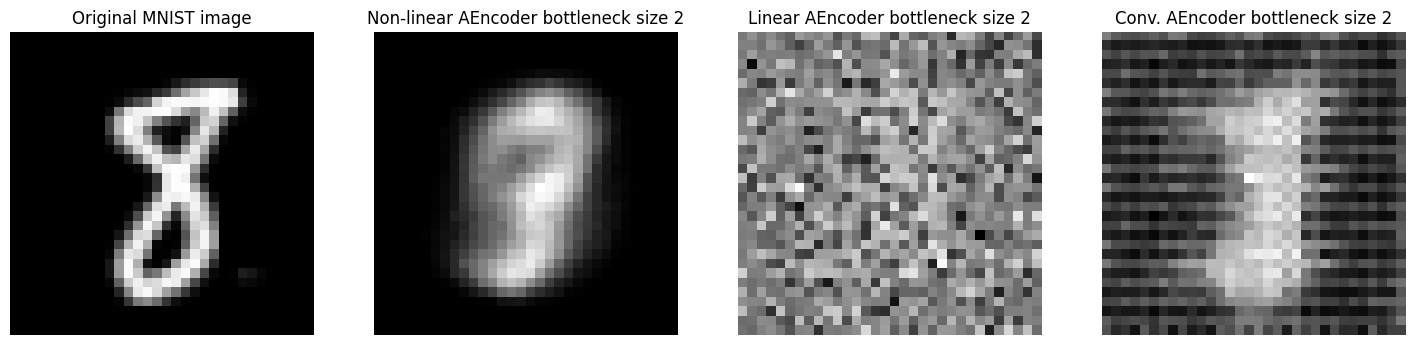

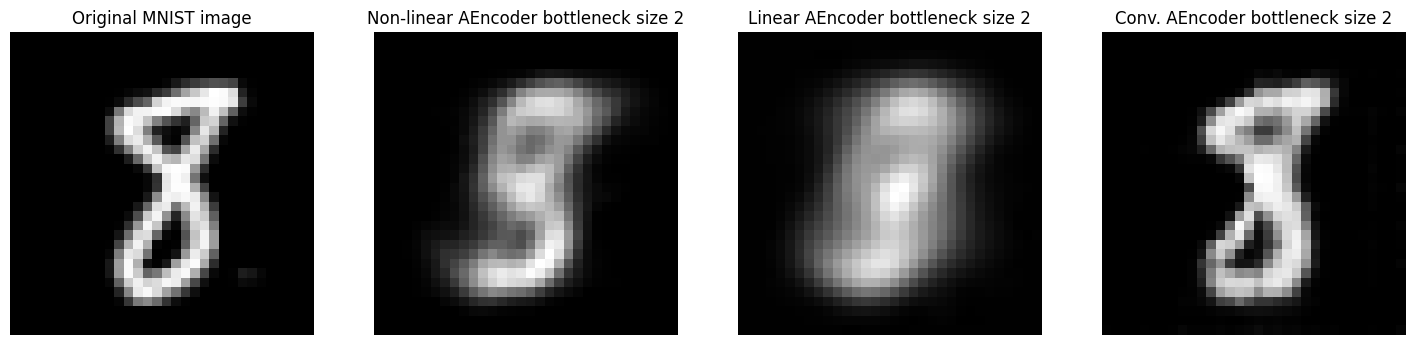

In [19]:
import random
import pathlib
import matplotlib.pyplot as plt
pathlib.Path("graph/").mkdir(parents=True, exist_ok=True)

train_set, test_set = get_data()

conv_model = get_model(3, 2)
ae_model = get_model(1, 2)
s_ae_model = get_model(2, 2)

conv_name = str(conv_model.__class__.__name__) + "_bottleneck_" + str(2)
ae_name = str(ae_model.__class__.__name__) + "_bottleneck_" + str(2)
s_ae_name = str(s_ae_model.__class__.__name__) + "_bottleneck_" + str(2)
random.seed(444)
generated_index = random.randint(1, 10000)

image, label = test_set[generated_index]

ae_model.load_state_dict(torch.load("intermediate/" + ae_name + "/model", weights_only=True))
s_ae_model.load_state_dict(torch.load("intermediate/" + s_ae_name + "/model", weights_only=True))
conv_model.load_state_dict(torch.load("intermediate/" + conv_name + "/model", weights_only=True))

s_ae_model.eval()
ae_model.eval()
conv_model.eval()

_, ae_reconstructed = ae_model(image.unsqueeze(0))
_, s_ae_reconstructed = s_ae_model(image.unsqueeze(0))
_, conv_reconstructed = conv_model(image.unsqueeze(0))

ae_reconstructed = ae_reconstructed.detach().numpy()
s_ae_reconstructed = s_ae_reconstructed.detach().numpy()
conv_reconstructed = conv_reconstructed.detach().numpy()

plt.rcParams["figure.figsize"] = (18, 6)
fig, ax = plt.subplots(1, 4)

ax[0].imshow(image.squeeze(), cmap="gray")
ax[0].set_title("Original MNIST image")
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
ax[0].axis("off")

ax[1].imshow(ae_reconstructed.squeeze(), cmap="gray")
ax[1].set_title("Non-linear AEncoder bottleneck size 2")
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].axis("off")

ax[2].imshow(s_ae_reconstructed.squeeze(), cmap="gray")
ax[2].set_title("Linear AEncoder bottleneck size 2")
ax[2].set_xticklabels([])
ax[2].set_yticklabels([])
ax[2].axis("off")

ax[3].imshow(conv_reconstructed.squeeze(), cmap="gray")
ax[3].set_title("Conv. AEncoder bottleneck size 2")
ax[3].set_xticklabels([])
ax[3].set_yticklabels([])
ax[3].axis("off")

plt.savefig("graph/compare-aencoder-convencoder-original.png")

## PCA embedding versus auto-encoder embedding

For two models the embeddings produced by the models are compared to the PCA embedding, and for the sufficiently trained linear auto-encoder the embeddings are almost the same. The embedding produced by the well-trained auto-encoder models is generallly quiet separable.

In [38]:
import pandas as pd

def pca_versus_encoding_display(test_set, linear_encoded_data, model, name):
    print(model.__class__.__name__)
    print(model)
    # split test data in labels and data, flatten data
    flat_images=[d[0].flatten(1) for d in test_set]
    data = np.asarray(torch.cat(flat_images, dim=0), dtype=np.float32)
    labels = np.array([d[1] for d in test_set]).reshape(-1,1)

    # apply pca transformation
    pca = PCA(n_components=2)
    pca_encoding = pca.fit_transform(data)
    pca_encoding = np.concatenate((pca_encoding, labels), axis=-1)
    pca_encoding = pd.DataFrame(pca_encoding, columns=["x", "y", "class"])
    pca_encoding = pca_encoding.sort_values(by="class")
    pca_encoding["class"] = pca_encoding["class"].astype(int).astype(str)

    # use the encoded data that was generated in the last epoch, prepare for plotting
    linauto_encoding = linear_encoded_data[-1]
    linauto_encoding = pd.DataFrame(linauto_encoding, columns=["x", "y", "class"])
    linauto_encoding = linauto_encoding.sort_values(by="class")
    linauto_encoding["class"] = linauto_encoding["class"].astype(int).astype(str)

    f, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))

    for grouper, group in linauto_encoding.groupby("class"):
        ax1.scatter(x=group["x"], y=group["y"], label=grouper, alpha=0.8, s=5)

    ax1.legend()
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.set_title(name+" embeddings")

    for grouper, group in pca_encoding.groupby("class"):
        ax2.scatter(x=group["x"], y=group["y"], label=grouper, alpha=0.8, s=5)

    ax2.legend()
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.set_title("PCA embeddings")

    plt.show()
    plt.savefig("graph/PCA/"+name+".png")

    pc_1, pc_2 = torch.tensor(pca.components_[0]), torch.tensor(pca.components_[1])

    print("Angle between PCA components", torch.rad2deg(torch.acos(torch.dot(pc_1, pc_2))).item())

    model_weights = model.encoder[0].weight

    weight_vector_1, weight_vector_2 = model_weights[0], model_weights[1]
    print("weight vector 1 shape", weight_vector_1.shape)
    print("weight vector 2 shape", weight_vector_2.shape)

    print("Normalize the 2 weight vectors via their respective magnitudes")
    weight_vector_1 = weight_vector_1 / torch.linalg.vector_norm(weight_vector_1)
    weight_vector_2 = weight_vector_2 / torch.linalg.vector_norm(weight_vector_2)

    print("Check the magnitude of the 2 normalized weight vectors")
    magnitude1=torch.torch.sqrt(torch.sum(weight_vector_1**2))
    print(f'magnitude weight vector 1 {magnitude1}')
    magnitude2=torch.torch.sqrt(torch.sum(weight_vector_1**2))
    print(f'magnitude weight vector 2 {magnitude2}')
    print("Angle between linear auto-encoder vectors",
    torch.rad2deg(torch.acos(torch.dot(weight_vector_1, weight_vector_2))).item())


AEncoder
AEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=1024, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=1024, bias=True)
    (7): Sigmoid()
  )
)


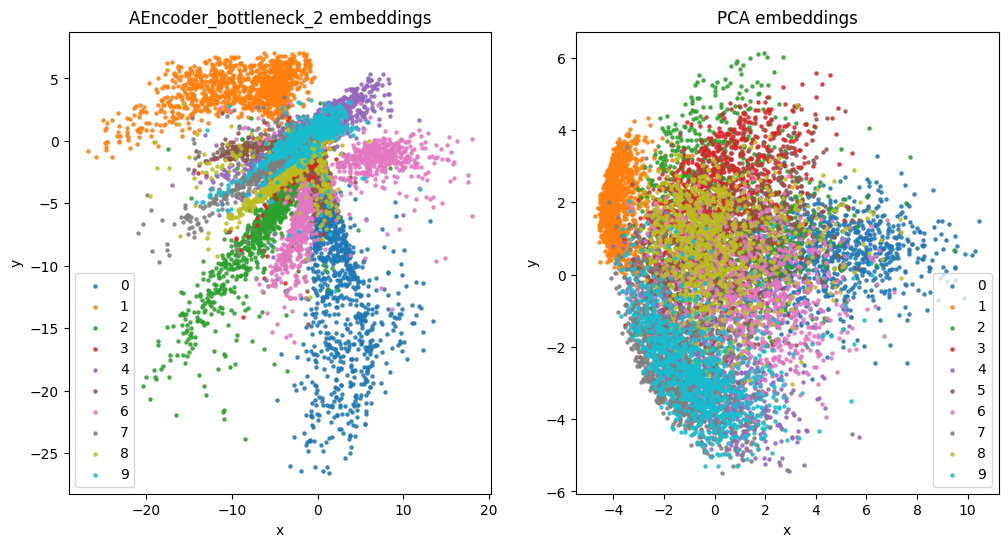

Angle between PCA components 90.0
weight vector 1 shape torch.Size([1024])
weight vector 2 shape torch.Size([1024])
Normalize the 2 weight vectors via their respective magnitudes
Check the magnitude of the 2 normalized weight vectors
magnitude weight vector 1 1.0
magnitude weight vector 2 1.0
Angle between linear auto-encoder vectors 86.46136474609375
SimpleAEncoder
SimpleAEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=1024, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=1024, bias=True)
  )
)


<Figure size 1800x600 with 0 Axes>

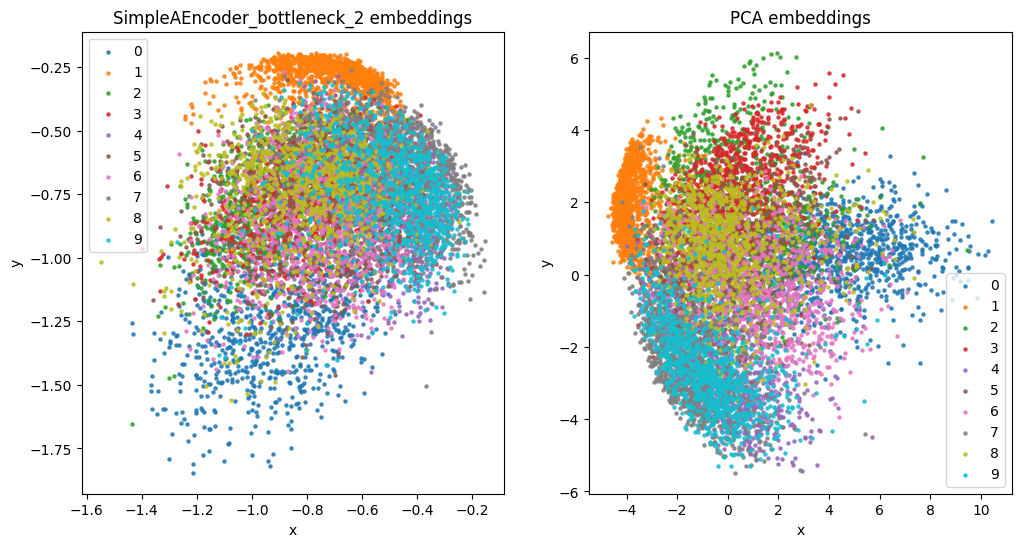

Angle between PCA components 90.0
weight vector 1 shape torch.Size([1024])
weight vector 2 shape torch.Size([1024])
Normalize the 2 weight vectors via their respective magnitudes
Check the magnitude of the 2 normalized weight vectors
magnitude weight vector 1 1.0
magnitude weight vector 2 1.0
Angle between linear auto-encoder vectors 93.71488952636719


<Figure size 1800x600 with 0 Axes>

In [39]:
# produce pca graphs
import pickle
import numpy as np
from sklearn.decomposition import PCA

models=[1,2,3]
bottleneck_sizes=[2]

for model_id in models:
    for bs in bottleneck_sizes:
        if bs == 2 and not model_id==3:
            model = get_model(model_id, bs)
            name = str(model.__class__.__name__) + "_bottleneck_" + str(bs)

            pathlib.Path("graph/PCA").mkdir(parents=True, exist_ok=True)

            train_set, test_set = get_data()

            with open('intermediate/' + name + '/encoded_data.pkl', 'rb') as f:
                encoded_data = pickle.load(f)

            model.load_state_dict(torch.load("intermediate/" + name + "/model", weights_only=True))
            model.eval()

            pca_versus_encoding_display(test_set, encoded_data, model, name)

### Generating numbers from the encoded data

As can be seen from the embedding produced by the auto-encoder models, MNIST digits are somehow separable.  This separation allows the decoder to reconstruct the MNIST digit. As an experiment this part will use the bottleneck dimensional median values for every MNIST digit cluster will be used to generate numbers 0 to 9. When reconstructing from untrained models' embedding data looks like below.
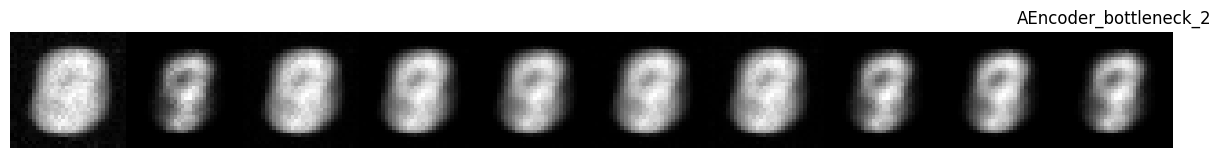
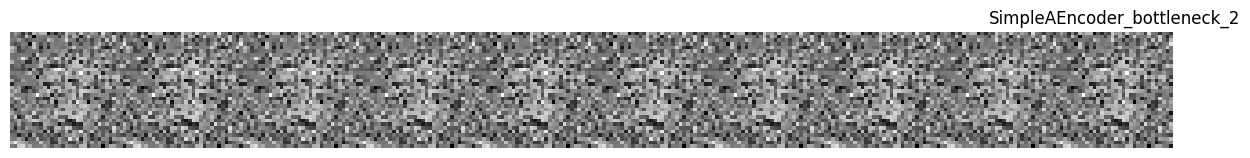
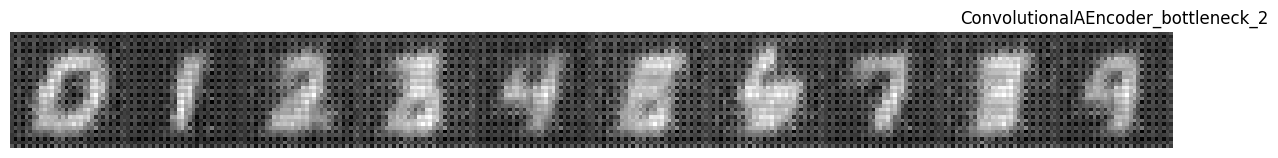

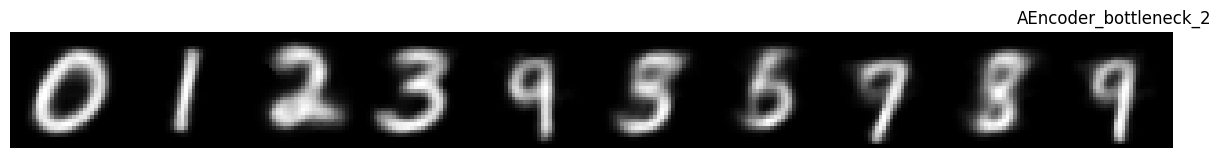

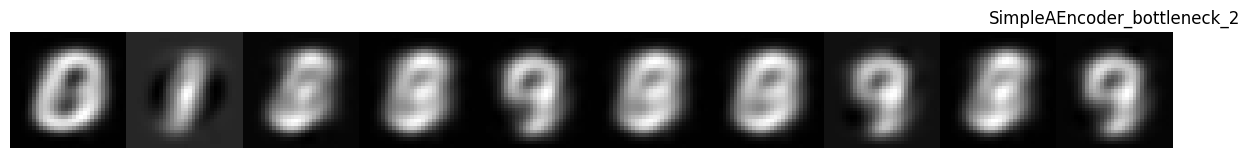

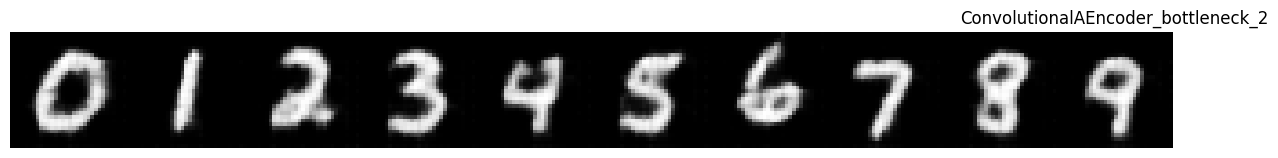

In [40]:
# produce median embeddings
pathlib.Path("graph/generate_from_median").mkdir(parents=True, exist_ok=True)
for model_id in models:
    for bs in bottleneck_sizes:

        model = get_model(model_id, bs)
        name = str(model.__class__.__name__) + "_bottleneck_" + str(bs)
        
        model.load_state_dict(torch.load("intermediate/" + name + "/model", weights_only=True))

        with open('intermediate/' + name + '/encoded_data.pkl', 'rb') as f:
            encoded_data = pickle.load(f)

        final_embeddings = encoded_data[-1]

        median_digit_embeddings_l = []

        for i in range(10):
            if model_id != 3:
                median_embeddings = np.median(final_embeddings[final_embeddings[:, bs] == i][:, :bs], axis=0)
            elif model_id == 3:
                last_dim = final_embeddings.shape[-1]
                final_embeddings_ = final_embeddings[final_embeddings[:, last_dim - 1] == i][:, :last_dim - 1]
                sz = final_embeddings_.shape[0]
                fg = final_embeddings_.reshape(sz, bs, 4, 4)
                median_embeddings = np.median(fg, axis=0)

            median_digit_embeddings_l.append(median_embeddings)

        median_digit_embeddings = torch.tensor(np.array(median_digit_embeddings_l))
        pred_images = model.forward_dec(median_digit_embeddings.to("cpu"))

        fig, axes = plt.subplots(1, 10, figsize=(15, 2))
        for idx, img in enumerate(pred_images):
            img = img.squeeze().detach().cpu().numpy()
            axes[idx].imshow(img, cmap="gray")
            axes[idx].set_xticklabels([])
            axes[idx].set_yticklabels([])
            axes[idx].axis("off")

        fig.subplots_adjust(wspace=0, hspace=0)
        plt.title(name)
        plt.savefig("graph/generate_from_median/" + name + ".png")

##  On vectors, normalization and magnitude

A normalized vector is a vector that has been scaled to a length of 1 while maintaining its original direction. This resulting vector is also known as a unit vector. To normalize a vector, you divide each of its components by its magnitude.

For a vector $v=(x,y)$, the magnitude is $||v||=\sqrt{x^{2}+y^{2}}$

For a 2D vector, the normalized vector is $\frac{x}{||v||},\frac{y}{||v||}$

The dot product of two vectors is equal to the product of their magnitudes and the cosine of the angle between them $$a\cdot b=||a||.||b||\cos \theta$$

In linear algebra, the concept of orthogonality is the generalization of perpendicularity to vectors. Two orthogonal vectors are not correlated, and this is often desirable when trying to understand the independent sources of variation (variance) within a dataset. To test whether this perpendicularity applies for the weights on the 2*1024 connections to the 2 bottleneck dimensions, the following formula was used.

$$torch.rad2deg(torch.acos(torch.dot(weight\_vector\_1, weight\_vector\_2))).item())$$

This formula stems from:

$$\cos \theta=\frac{a\cdot b}{||a||.||b||}$$

In the image some vectors are shown, these vectors are no unit vectors, and hence for some calculations are unusable. After normalisation, it is clear they have the same magnitude, but differ in direction.

In [28]:
from matplotlib.legend_handler import HandlerPatch
import matplotlib.patches as mpatches

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

def make_legend_arrow(legend, orig_handle,
                      xdescent, ydescent,
                      width, height, fontsize):
    p = mpatches.FancyArrow(0, 0.5*height, width, 0, length_includes_head=True, head_width=0.75*height )
    return p


vectors
[[0 4]
 [4 0]
 [4 4]]
normalized vectors
[[0.         1.        ]
 [1.         0.        ]
 [0.70710678 0.70710678]]
magnitudes for normalized vectors
[[1.]
 [1.]
 [1.]]
magnitudes for vectors
[[4.        ]
 [4.        ]
 [5.65685425]]
 90° vector dotproduct 0.0
 45° vector dotproduct 0.7071067811865475
 45° vector dotproduct unnormalized 16
 acos of 90° dotproduct of normalized vectors  1.5707963267948966
 acos of 45° dotproduct of normalized vectors  0.7853981633974484
 acos of 45° dotproduct of unnormalized vectors  nan
 rad2deg for acos of '90° normalized vector dotproduct' 90.0
 rad2deg for acos of '45° normalized vector dotproduct' 45.00000000000001
 rad2deg for acos of '45° unnormalized vector dotproduct' nan


C:\Users\wilfr\AppData\Local\Temp\ipykernel_14228\1796481135.py:30: RuntimeWarning: invalid value encountered in arccos
  acos_45_unnormalized =np.acos(dot_product_45_unnormalized)


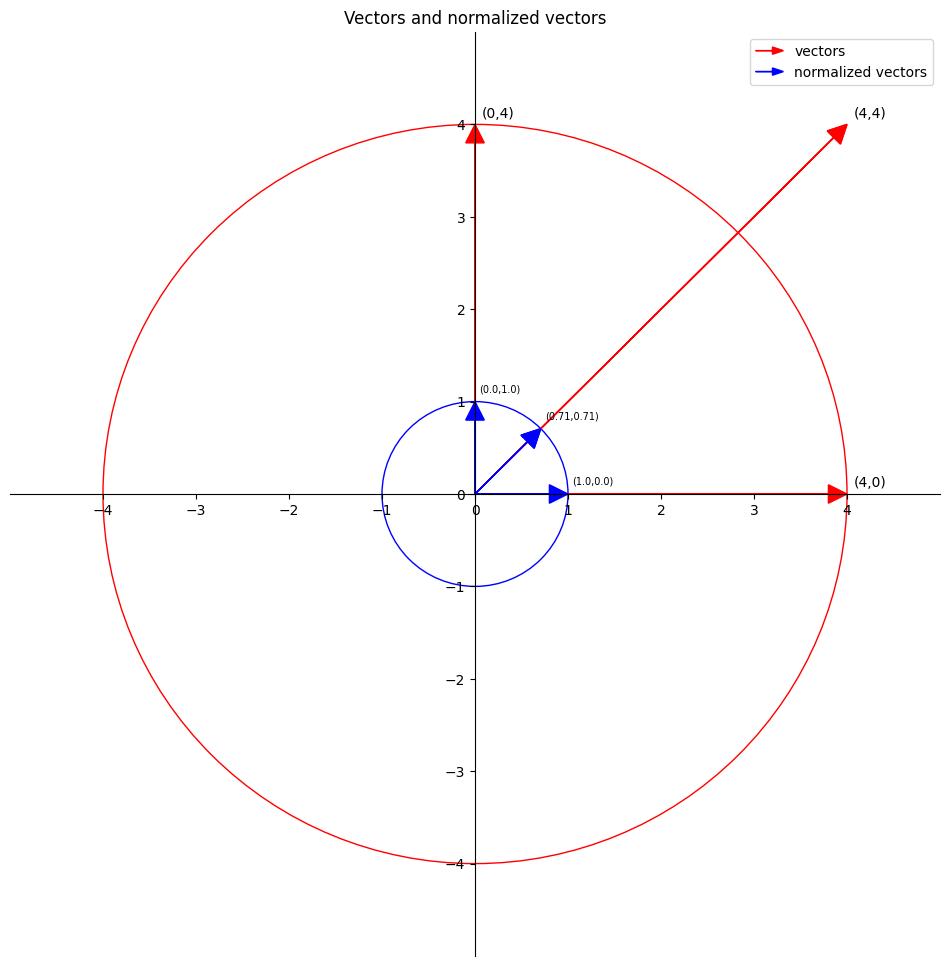

In [29]:
import matplotlib.pyplot as plt
import numpy as np

vectors = np.array([[0,4],[4,0],[4,4]])
print("vectors")
print(vectors)

#Calculate normalized vectors
normalized_vectors= vectors  / np.sqrt((vectors ** 2).sum(-1))[..., np.newaxis]
normalized_vectors_alt = vectors/np.sqrt(np.sum(np.power(vectors,2),axis=1))[:,None]
print("normalized vectors")
print(normalized_vectors)

#Calculate the magnitude of the normalized vectors
magnitudes = np.sqrt((normalized_vectors ** 2).sum(-1))[..., np.newaxis]
magnitudes_for_vectors = np.sqrt((vectors ** 2).sum(-1))[..., np.newaxis]
print("magnitudes for normalized vectors")
print(magnitudes)
print("magnitudes for vectors")
print(magnitudes_for_vectors)

dot_product_90 =np.dot(normalized_vectors[0],normalized_vectors[1])
dot_product_45 =np.dot(normalized_vectors[1],normalized_vectors[2])
dot_product_45_unnormalized =np.dot(vectors[1],vectors[2])
print(f' 90° vector dotproduct {dot_product_90}')
print(f' 45° vector dotproduct {dot_product_45}')
print(f' 45° vector dotproduct unnormalized {dot_product_45_unnormalized}')
acos_90=np.acos(dot_product_90)
acos_45=np.acos(dot_product_45)
acos_45_unnormalized =np.acos(dot_product_45_unnormalized)
print(f' acos of 90° dotproduct of normalized vectors  {acos_90}')
print(f' acos of 45° dotproduct of normalized vectors  {acos_45}')
print(f' acos of 45° dotproduct of unnormalized vectors  {acos_45_unnormalized}')
rad2deg_90=np.rad2deg(acos_90)
rad2deg_45=np.rad2deg(acos_45)
rad2deg_45_unnormalized=np.rad2deg(acos_45_unnormalized)
print(f" rad2deg for acos of '90° normalized vector dotproduct' {rad2deg_90}")
print(f" rad2deg for acos of '45° normalized vector dotproduct' {rad2deg_45}")
print(f" rad2deg for acos of '45° unnormalized vector dotproduct' {rad2deg_45_unnormalized}")


fig, ax = plt.subplots(figsize=(12, 12))
ax.axis([-5,5,-5,5])


# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

for i in range(len(vectors)):
    ax.arrow(0, 0, vectors[i][0], vectors[i][1], head_width=0.2, head_length=0.2, fc='red',ec='red', length_includes_head=True)
    ax.annotate(text="("+str(vectors[i][0])+","+str(vectors[i][1])+")",xy=(vectors[i][0], vectors[i][1]), xytext=(5,5), textcoords='offset points')

for i in range(len(normalized_vectors)):
    ax.arrow(0, 0, normalized_vectors[i][0], normalized_vectors[i][1], head_width=0.2, head_length=0.2, fc='blue', ec='blue', length_includes_head=True)
    ax.annotate(text="("+str(round(normalized_vectors[i][0],2))+","+str(round(normalized_vectors[i][1],2))+")",xy=(normalized_vectors[i][0], normalized_vectors[i][1]), xytext=(3,7), textcoords='offset points', fontsize=7)

tcks=range(-4,5,1)


ax.set_xticks(tcks)
ax.set_yticks(tcks)
c1=plt.Circle((0, 0), 4, color='r',fill=False)
c2=plt.Circle((0, 0), 1, color='b',fill=False)
ax.add_patch(c1)
ax.add_patch(c2)
ax.set_title("Vectors and normalized vectors")
red_arrow=ax.arrow(0, 0, vectors[i][0], vectors[i][1], head_width=0.2, head_length=0.2, fc='red',ec='red', length_includes_head=True)
blue_arrow=ax.arrow(0, 0, normalized_vectors[i][0], normalized_vectors[i][1], head_width=0.2, head_length=0.2, fc='blue', ec='blue', length_includes_head=True)
leg=[red_arrow,blue_arrow]
plt.legend(leg, ['vectors', 'normalized vectors'], handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow)})
plt.show()